# Range of Motion Analysis

---

## Instructions

This process requires deeplabcut [link] and the configuration file and model provided by the SDZWA Conservation Technology Lab [link].

Preprocessing steps:


1.   Download and unzip the project [link]
2.   Install and open deeplabcut.
3.   Open the config file from within deeplabcut.
4.   Analyze selected videos, making sure to select the option to save results as csv. 
5.   With the csv files, apply the calculations below.
 



In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt


Each joint comprises two vectors, one from point P1 to P2 (vector a) and one from P1 to P3 (vector b), with P1 as the vertex. The length of each vector is 

a = (p1.x - p2.x, p1.y - p2.y)<br>
b = (p1.x - p3.x, p1.y - p3.y)

You can then invert the dot product formula to get the angle between the two vectors:<br>
![alt text](https://i.stack.imgur.com/WM5f7.png) <br>
Remember that dot product just means: a1*b1 + a2*b2 (just 2 dimensions here...)

Here we define a function to calculate the angle given three [x,y] points. 

In [ ]:
def angle(p1,p2,p3,): # three [x,y] pairs with p2 as the vertex
  if(p1 and p2 and p3):
    dot = ((p1[0] - p2[0]) * (p3[0] - p2[0])) + ((p1[1] - p2[1]) * (p3[1] - p2[1]))
    s12 = np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
    s23 = np.sqrt((p3[0] - p2[0])**2 + (p3[1] - p2[1])**2)
    ratio = dot/(s12*s23)
    angle = math.degrees(np.arccos(ratio))
    return angle
  else:
    print("Points not defined")
    return 0

The function below 

In [ ]:
def read(dfile,side):
  elephantdata = pd.read_csv(dfile,header=[1,2]).drop("bodyparts",axis=1)

  elbowAngles = np.zeros((len(elephantdata)))
  wristAngles = np.zeros((len(elephantdata)))
  kneeAngles = np.zeros((len(elephantdata)))
  ankleAngles = np.zeros((len(elephantdata)))
  for i,frame in elephantdata.iterrows():
    
    if side == "Left":
      elbowAngles[i] = angle((frame["leftshoulder"]["x"],frame["leftshoulder"]["y"]),
                  (frame["leftelbow"]["x"],frame["leftelbow"]["y"]),
                  (frame["leftwrist"]["x"],frame["leftwrist"]["y"])) 
      wristAngles[i] = angle((frame["leftelbow"]["x"],frame["leftelbow"]["y"]),
                  (frame["leftwrist"]["x"],frame["leftwrist"]["y"]),
                  (frame["leftforefoot"]["x"],frame["leftforefoot"]["y"]))    
      kneeAngles[i] = angle((frame["lefthip"]["x"],frame["lefthip"]["y"]),
                  (frame["leftknee"]["x"],frame["leftknee"]["y"]),
                  (frame["leftankle"]["x"],frame["leftankle"]["y"])) 
      ankleAngles[i] = angle((frame["leftknee"]["x"],frame["leftknee"]["y"]),
                  (frame["leftankle"]["x"],frame["leftankle"]["y"]),
                  (frame["lefthindfoot"]["x"],frame["lefthindfoot"]["y"])) 

    elif side == "Right":
      elbowAngles[i] = angle((frame["rightshoulder"]["x"],frame["rightshoulder"]["y"]),
                  (frame["rightelbow"]["x"],frame["rightelbow"]["y"]),
                  (frame["rightwrist"]["x"],frame["rightwrist"]["y"]))
      kneeAngles[i] = angle((frame["rightelbow"]["x"],frame["rightelbow"]["y"]),
                  (frame["rightwrist"]["x"],frame["rightwrist"]["y"]),
                  (frame["rightforefoot"]["x"],frame["rightforefoot"]["y"]))
      stifleAngles[i] = angle((frame["righthip"]["x"],frame["righthip"]["y"]),
                  (frame["rightknee"]["x"],frame["rightknee"]["y"]),
                  (frame["rightankle"]["x"],frame["rightankle"]["y"]))
      ankleAngles[i] = angle((frame["rightknee"]["x"],frame["rightknee"]["y"]),
                  (frame["rightankle"]["x"],frame["rightankle"]["y"]),
                  (frame["righthindfoot"]["x"],frame["righthindfoot"]["y"]))
       
  return pd.DataFrame({ "Elbow" : elbowAngles,
                        "Wrist" : wristAngles,
                        "Knee" : kneeAngles,
                        "Ankle" : ankleAngles,
  })

In [ ]:
# Shanthi FACING LEFT
Shanthi1 = "/content/Shanthi_Left_2020-05-06DLC_resnet50_Elephant2.2Jul10shuffle1_100000.csv"
ShanthiL1 = read(Shanthi1, "Left")

# Shanthi FACING LEFT
Shanthi2 = "/content/Shanthi_Left_2019-01-04DLC_resnet50_Elephant2.2Jul10shuffle1_100000.csv"
ShanthiL2 = read(Shanthi2, "Left")

ShanthiL = pd.concat([ShanthiL1,ShanthiL2])

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0, 'Elbow Angle')

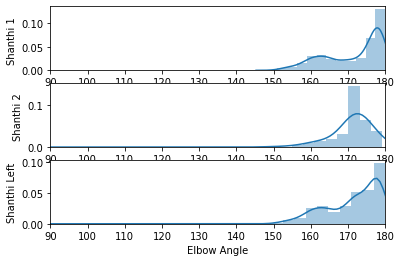

In [ ]:
ax1 = plt.subplot(3,1,1)
sns.distplot(ShanthiL1["Knee"])
plt.xlim(90,180)
plt.ylabel("Shanthi 1 ")
plt.subplot(3,1,2,sharex=ax1)
sns.distplot(ShanthiL2["Knee"])
plt.ylabel("Shanthi 2 ")
plt.subplot(3,1,3,sharex=ax1)
sns.distplot(ShanthiL["Knee"])
plt.ylabel("Shanthi Left")
plt.xlabel("Elbow Angle")